In [2]:
dataset = sm.datasets.get_rdataset("clouds", package = "HSAUR")
df = dataset.data
df.tail()

,seeding,time,sne,cloudcover,prewetness,echomotion,rainfall
19,yes,59,3.40,6.5,0.142,stationary,5.45
20,yes,65,3.15,3.1,0.073,moving,2.02
21,no,68,3.15,2.6,0.136,moving,0.82
22,yes,82,4.01,8.3,0.123,moving,1.09
23,no,83,4.65,7.4,0.168,moving,0.28


##### 1.1 선형모형
- 종속변수 rainfall을 다른 변수로 예측하는 선형 모형을 만들고 결정계수로 성능을 구하여라

In [3]:
%matplotlib inline

In [4]:
from matplotlib import rc

plt.style.use('seaborn')
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [20]:
formula_simple = "rainfall ~ " + "seeding + scale(time) + scale(sne) + scale(cloudcover)\
                + scale(prewetness) + echomotion"

In [21]:
model1 = sm.OLS.from_formula(formula_simple, data=df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:               rainfall   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1.773
Date:                Sat, 23 May 2020   Prob (F-statistic):              0.165
Time:                        09:19:50   Log-Likelihood:                -54.936
No. Observations:                  24   AIC:                             123.9
Df Residuals:                      17   BIC:                             132.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

##### 1.3 seeding이 영향을 끼치는지?
- ANOVA분석으로 검정, 유의수준 10%

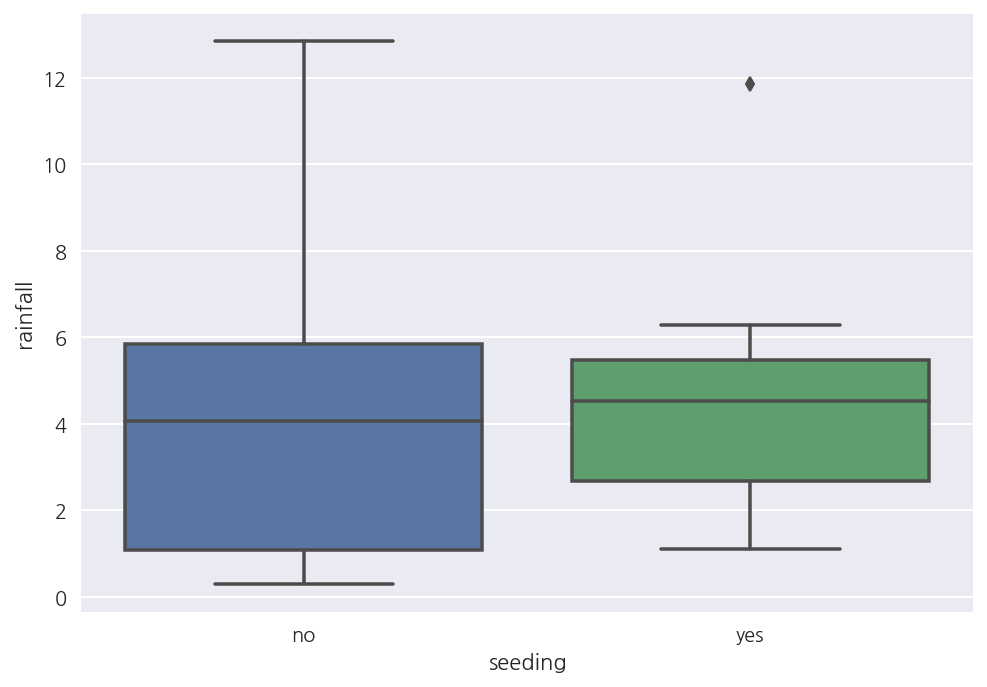

In [22]:
sns.boxplot(x = "seeding", y = "rainfall", data=df)
plt.show()

In [23]:
model = sm.OLS.from_formula("rainfall ~ seeding", data=df)
result = model.fit()

In [25]:
sm.stats.anova_lm(result)
# R-squared 값이 0인가 아닌가를 테스트 하는게 핵심
# F-test
# 답 : ANOVA 분석의 유의확률은 72%이므로 seeding은 영향을 미치지 않는다.

,df,sum_sq,mean_sq,F,PR(>F)
seeding,1.0,1.283438,1.283438,0.127733,0.7242
Residual,22.0,221.051458,10.047794,NaN,NaN
